<a href="https://colab.research.google.com/github/azamjon98/test/blob/main/notebookbaf5f55507.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'apartments-for-rent-classified:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F3617494%2F6290263%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240604%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240604T051133Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D2170d8a933a4684530f4721a5a110983b231c525c91cea7fea15eff15383e5acb18ab4484ba387f9ae22d113f9eeb4a36e53dfbee62ba381d4332d88a400774f3f350cb82b4e076f0e4117788b00d1c63de719491b0a66d1142844e0222b66554f581c70afae1a02a6701d7f22a85f778c3466400f80313d57abb91dd34161632affcc1a103da5b8dcb097a2e74ead38239cb020f91ac1478c1e8cfeab856b53110887ecf1593d0306c889aba2918d3236c6d452f07c1c966cc539ffa8da1d0b620e8dbe06012f301c63f1c3a3fd46d7c3e68281898c29b36bd913e789664f6e1aa69ea45f9756f393cab7151903deb9f4f3395d8614b3e45b978e7a33542fe3'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 28697488 bytes downloaded
Downloaded and uncompressed: apartments-for-rent-classified
Data source import complete.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/apartments-for-rent-classified/apartments_for_rent_classified_10K/apartments_for_rent_classified_10K.csv
/kaggle/input/apartments-for-rent-classified/apartments_for_rent_classified_100K/apartments_for_rent_classified_100K.csv


In [3]:
train=pd.read_csv('/kaggle/input/apartments-for-rent-classified/apartments_for_rent_classified_100K/apartments_for_rent_classified_100K.csv',sep=';',encoding='latin')

<ipython-input-3-c375aa55858a>:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  train=pd.read_csv('/kaggle/input/apartments-for-rent-classified/apartments_for_rent_classified_100K/apartments_for_rent_classified_100K.csv',sep=';',encoding='latin')


In [4]:
train.head()

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5668640009,housing/rent/apartment,One BR 507 & 509 Esplanade,"This unit is located at 507 & 509 Esplanade, R...",NaN,1.0,1.0,USD,No,Thumbnail,...,"$2,195",Monthly,542,507 509 Esplanade,Redondo Beach,CA,33.8520,-118.3759,RentLingo,1577360355
1,5668639818,housing/rent/apartment,Three BR 146 Lochview Drive,"This unit is located at 146 Lochview Drive, Ne...",NaN,1.5,3.0,USD,No,Thumbnail,...,"$1,250",Monthly,1500,146 Lochview Dr,Newport News,VA,37.0867,-76.4941,RentLingo,1577360340
2,5668639686,housing/rent/apartment,Three BR 3101 Morningside Drive,This unit is located at 3101 Morningside Drive...,NaN,2.0,3.0,USD,No,Thumbnail,...,"$1,395",Monthly,1650,3101 Morningside Dr,Raleigh,NC,35.8230,-78.6438,RentLingo,1577360332
3,5668639659,housing/rent/apartment,Two BR 209 Aegean Way,"This unit is located at 209 Aegean Way, Vacavi...",NaN,1.0,2.0,USD,No,Thumbnail,...,"$1,600",Monthly,820,209 Aegean Way,Vacaville,CA,38.3622,-121.9712,RentLingo,1577360330
4,5668639374,housing/rent/apartment,One BR 4805 Marquette NE,"This unit is located at 4805 Marquette NE, Alb...",NaN,1.0,1.0,USD,No,Thumbnail,...,$975,Monthly,624,4805 Marquette NE,Albuquerque,NM,35.1038,-106.6110,RentLingo,1577360308


In [55]:
# general information
df=train.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             99492 non-null  int64  
 1   category       99492 non-null  object 
 2   title          99492 non-null  object 
 3   body           99492 non-null  object 
 4   amenities      83448 non-null  object 
 5   bathrooms      99429 non-null  float64
 6   bedrooms       99368 non-null  float64
 7   currency       99492 non-null  object 
 8   fee            99492 non-null  object 
 9   has_photo      99492 non-null  object 
 10  pets_allowed   39068 non-null  object 
 11  price          99491 non-null  float64
 12  price_display  99491 non-null  object 
 13  price_type     99492 non-null  object 
 14  square_feet    99492 non-null  int64  
 15  address        7943 non-null   object 
 16  cityname       99190 non-null  object 
 17  state          99190 non-null  object 
 18  latitu

In [56]:
df.isna().sum()/len(df)*100

id                0.000000
category          0.000000
title             0.000000
body              0.000000
amenities        16.125920
bathrooms         0.063322
bedrooms          0.124633
currency          0.000000
fee               0.000000
has_photo         0.000000
pets_allowed     60.732521
price             0.001005
price_display     0.001005
price_type        0.000000
square_feet       0.000000
address          92.016444
cityname          0.303542
state             0.303542
latitude          0.025128
longitude         0.025128
source            0.000000
time              0.000000
dtype: float64

In [57]:
df[['price','price_display']]
# price_display ni tashlab yuborsa b-di

,price,price_display
0,2195.0,"$2,195"
1,1250.0,"$1,250"
2,1395.0,"$1,395"
3,1600.0,"$1,600"
4,975.0,$975
...,...,...
99487,780.0,$780
99488,813.0,$813
99489,1325.0,"$1,325"
99490,931.0,$931


In [58]:
cols=['bathrooms','bedrooms','price']
df.dropna(subset=cols, inplace=True)
df[cols].isna().sum()

bathrooms    0
bedrooms     0
price        0
dtype: int64

In [59]:
df['pets_allowed']=train['pets_allowed'].fillna('None')
df['pets_allowed']=np.where(df['pets_allowed']=='None',0,1)
df['pets_allowed'].head()
#df['pets_allowed'].isna().sum()

0    1
1    1
2    0
3    1
4    1
Name: pets_allowed, dtype: int64

In [60]:
# price_displayni tashlab yuboramiz
df=df.drop('price_display',axis=1)

In [62]:
df['currency'].unique()
# currency nii tashlab yuboramiz sabab faqat 1 dona variable bor
df=df.drop('currency',axis=1)

KeyError: 'currency'

# CITY, State, Latitude, Longitude

In [63]:
df.loc[df['cityname'].isna() | df['state'].isna(), ['longitude', 'latitude']].value_counts()

longitude  latitude
-98.5576   39.8163     217
-75.9597   37.2770      16
-92.2006   37.8286      15
-78.9348   35.4164       7
-78.3960   36.3540       7
-78.1713   36.4861       4
-122.6052  38.7904       3
-78.3435   35.6032       2
-117.2430  34.2143       1
-82.1971   28.4590       1
Name: count, dtype: int64

In [64]:
df.loc[((df['cityname'].isna()) | (df['state'].isna())) & (df['longitude']==-98.5576), 'cityname'] = 'Lebanon'
df.loc[((df['cityname'].isna()) | (df['state'].isna())) & (df['longitude']==-98.5576), 'state'] = 'KS'
df.loc[((df['cityname'].isna()) | (df['state'].isna())) & (df['longitude']==-75.9597), 'cityname'] = 'Cape Charles'
df.loc[((df['cityname'].isna()) | (df['state'].isna())) & (df['longitude']==-75.9597), 'state'] = 'VA'
df.loc[((df['cityname'].isna()) | (df['state'].isna())) & (df['longitude']==-92.2006), 'cityname'] = 'Waynesville'
df.loc[((df['cityname'].isna()) | (df['state'].isna())) & (df['longitude']==-92.2006), 'state'] = 'MO'

df = df.dropna(subset=['cityname', 'state'])
df[['cityname', 'state']].isna().sum()

cityname    0
state       0
dtype: int64

In [65]:
df.isna().sum()

id                  0
category            0
title               0
body                0
amenities       15949
bathrooms           0
bedrooms            0
fee                 0
has_photo           0
pets_allowed        0
price               0
price_type          0
square_feet         0
address         91361
cityname            0
state               0
latitude            0
longitude           0
source              0
time                0
dtype: int64

In [66]:
df['address'].head(10)
df['address'].nunique()
# address ni drop qilamiz sabab, bizda koordinates bor
df=df.drop('address',axis=1)

In [67]:
df['amenities'].nunique()

9805

In [68]:
print('top10',df['amenities'].value_counts().head(10))
print('-'*50)
print("last 10", df['amenities'].value_counts().tail(10))

top10 amenities
Parking               6178
Parking,Storage       2115
Gym,Pool              1871
Pool                  1479
Gym,Parking,Pool      1187
Parking,Pool           885
Washer Dryer           838
Patio/Deck             774
Clubhouse,Gym,Pool     759
Gym                    734
Name: count, dtype: int64
--------------------------------------------------
last 10 amenities
AC,Gated,Internet Access,Parking,Storage,Washer Dryer,Wood Floors                                                          1
Basketball,Clubhouse,Dishwasher,Fireplace,Gated,Patio/Deck,Playground,Pool,Refrigerator,Tennis,Washer Dryer,Wood Floors    1
AC,Gated,Gym,Parking,Patio/Deck,Pool,Washer Dryer,Wood Floors                                                              1
Gym,Parking,Tennis,Wood Floors                                                                                             1
AC,Cable or Satellite,Clubhouse,Gym,Hot Tub,Parking,Patio/Deck,Wood Floors                                             

In [69]:
df['amenities']

0                                                      NaN
1                                                      NaN
2                                                      NaN
3                                                      NaN
4                                                      NaN
                               ...                        
99487    Gym,Parking,Patio/Deck,Playground,Storage,Wood...
99488    AC,Cable or Satellite,Clubhouse,Dishwasher,Gym...
99489                        Garbage Disposal,Refrigerator
99490                                             Gym,Pool
99491                            Gated,Parking,Wood Floors
Name: amenities, Length: 99255, dtype: object

In [70]:
def classify_listing(amenities):
    luxury_amenities = {
        "Gym", "Pool", "Clubhouse", "Hot Tub",
        "Doorman", "Gated", "View",
        "Tennis", "Elevator", "Fireplace",
        "Basketball Court", "Basketball", "Playground", "Hot Tub",'luxury'
    }
    # Split and strip the amenities, and create a set
    amenities_set = set(amenity.strip() for amenity in amenities.split(','))

    # Check for any intersection with luxury amenities
    if amenities_set & luxury_amenities:
        return "luxury"
    else:
        return "basic"

In [71]:
df['amenities']=df['amenities'].fillna('basic')

In [72]:
df['amenities'].isna().sum()

0

In [73]:

df['amenities']=df['amenities'].apply(classify_listing)
df['amenities'].value_counts()

amenities
luxury    60010
basic     39245
Name: count, dtype: int64

In [74]:
df.isna().sum()

id              0
category        0
title           0
body            0
amenities       0
bathrooms       0
bedrooms        0
fee             0
has_photo       0
pets_allowed    0
price           0
price_type      0
square_feet     0
cityname        0
state           0
latitude        0
longitude       0
source          0
time            0
dtype: int64

In [75]:
df=df.drop(['id','title','body'],axis=1)
df.head()

,category,amenities,bathrooms,bedrooms,fee,has_photo,pets_allowed,price,price_type,square_feet,cityname,state,latitude,longitude,source,time
0,housing/rent/apartment,basic,1.0,1.0,No,Thumbnail,1,2195.0,Monthly,542,Redondo Beach,CA,33.8520,-118.3759,RentLingo,1577360355
1,housing/rent/apartment,basic,1.5,3.0,No,Thumbnail,1,1250.0,Monthly,1500,Newport News,VA,37.0867,-76.4941,RentLingo,1577360340
2,housing/rent/apartment,basic,2.0,3.0,No,Thumbnail,0,1395.0,Monthly,1650,Raleigh,NC,35.8230,-78.6438,RentLingo,1577360332
3,housing/rent/apartment,basic,1.0,2.0,No,Thumbnail,1,1600.0,Monthly,820,Vacaville,CA,38.3622,-121.9712,RentLingo,1577360330
4,housing/rent/apartment,basic,1.0,1.0,No,Thumbnail,1,975.0,Monthly,624,Albuquerque,NM,35.1038,-106.6110,RentLingo,1577360308


# Categorical ni numerical ga convert qilamiz

In [76]:
df['category'].value_counts()
df['category']=np.where((df['category']=="housing/rent/apartment")|(df['category']=="housing/rent/home"),'living','business')

In [77]:
df['category']=np.where(df['category']=='living',1,0)

# 1 means apartment or home
# 0 means other purposes

In [78]:
df['amenities']=np.where(df['amenities']=='basic',1,0)

# 1 means it has basic needs,
# 0 means it is luxury house

In [79]:
df['fee'].value_counts()
df['fee']=np.where(df['fee']=='Yes',1,0)

# 1 means there is an initial payment
# 0 means there is not an initial payment

In [80]:
df['has_photo'].value_counts()
df['has_photo']=np.where(df['has_photo']=='No',0,1)

# 1 means there is a photo
# 0 means there is not a photo

In [81]:
df.head()

,category,amenities,bathrooms,bedrooms,fee,has_photo,pets_allowed,price,price_type,square_feet,cityname,state,latitude,longitude,source,time
0,1,1,1.0,1.0,0,1,1,2195.0,Monthly,542,Redondo Beach,CA,33.8520,-118.3759,RentLingo,1577360355
1,1,1,1.5,3.0,0,1,1,1250.0,Monthly,1500,Newport News,VA,37.0867,-76.4941,RentLingo,1577360340
2,1,1,2.0,3.0,0,1,0,1395.0,Monthly,1650,Raleigh,NC,35.8230,-78.6438,RentLingo,1577360332
3,1,1,1.0,2.0,0,1,1,1600.0,Monthly,820,Vacaville,CA,38.3622,-121.9712,RentLingo,1577360330
4,1,1,1.0,1.0,0,1,1,975.0,Monthly,624,Albuquerque,NM,35.1038,-106.6110,RentLingo,1577360308


In [82]:
df['price_type'].value_counts()
# weekly paymentni monthly ga change qilish ucun
# weekly paymentni 4 ga multiply qilishimiz kerak
# keyin price type ni tashlab yuborsak b-di
mask=df['price_type'].isin(['Weekly'])


In [83]:
df.loc[mask,'price']=df.loc[mask,'price']*4

In [84]:
# Now we can drop column price_type
df=df.drop('price_type',axis=1)

In [85]:
df.head()

,category,amenities,bathrooms,bedrooms,fee,has_photo,pets_allowed,price,square_feet,cityname,state,latitude,longitude,source,time
0,1,1,1.0,1.0,0,1,1,2195.0,542,Redondo Beach,CA,33.8520,-118.3759,RentLingo,1577360355
1,1,1,1.5,3.0,0,1,1,1250.0,1500,Newport News,VA,37.0867,-76.4941,RentLingo,1577360340
2,1,1,2.0,3.0,0,1,0,1395.0,1650,Raleigh,NC,35.8230,-78.6438,RentLingo,1577360332
3,1,1,1.0,2.0,0,1,1,1600.0,820,Vacaville,CA,38.3622,-121.9712,RentLingo,1577360330
4,1,1,1.0,1.0,0,1,1,975.0,624,Albuquerque,NM,35.1038,-106.6110,RentLingo,1577360308


# Source
* 1 represents RentDigs.com or RentLingo
* 0 represents other sources

In [86]:

df['source']=np.where((df['source']=='RentDigs.com')|(df['source']=='RentLingo'),1,0)
df['source'].value_counts()

source
1    97639
0     1616
Name: count, dtype: int64

In [87]:
df.drop(['cityname','state'],axis=1).corr()

,category,amenities,bathrooms,bedrooms,fee,has_photo,pets_allowed,price,square_feet,latitude,longitude,source,time
category,1.000000,0.013140,-0.001968,0.001017,0.001060,-0.007593,0.016510,-0.006155,-0.007615,-0.009970,-0.015232,0.020411,-0.013758
amenities,0.013140,1.000000,-0.040407,0.066209,0.026903,-0.097826,-0.160460,0.010986,0.030171,0.111789,0.021561,-0.057646,0.141022
bathrooms,-0.001968,-0.040407,1.000000,0.679938,-0.011301,-0.000570,-0.008634,0.328928,0.716227,-0.091454,-0.012322,0.022966,-0.044744
bedrooms,0.001017,0.066209,0.679938,1.000000,0.011029,-0.003388,-0.023852,0.236004,0.701027,0.012614,0.038929,-0.021554,0.003254
fee,0.001060,0.026903,-0.011301,0.011029,1.000000,0.004102,-0.008997,0.021724,0.000754,0.029066,0.031454,-0.346641,0.052711
has_photo,-0.007593,-0.097826,-0.000570,-0.003388,0.004102,1.000000,0.071068,-0.033320,-0.007069,-0.020757,0.017888,-0.019971,-0.041146
pets_allowed,0.016510,-0.160460,-0.008634,-0.023852,-0.008997,0.071068,1.000000,-0.054493,-0.041654,-0.005220,0.000488,0.041402,0.036627
price,-0.006155,0.010986,0.328928,0.236004,0.021724,-0.033320,-0.054493,1.000000,0.411504,0.057137,-0.105686,0.007171,0.057105
square_feet,-0.007615,0.030171,0.716227,0.701027,0.000754,-0.007069,-0.041654,0.411504,1.000000,-0.036106,0.065364,-0.009423,-0.012521
latitude,-0.009970,0.111789,-0.091454,0.012614,0.029066,-0.020757,-0.005220,0.057137,-0.036106,1.000000,0.079375,-0.012573,0.198906


In [88]:
from sklearn.preprocessing import OrdinalEncoder

In [89]:
encoder=OrdinalEncoder()

In [90]:
df[['state']].value_counts()

state
TX       11236
CA       10254
VA        8297
NC        6299
CO        6280
FL        5768
MD        5276
MA        5026
OH        4902
GA        4752
NJ        4442
NV        2812
WA        2593
AZ        2375
LA        1344
MO        1217
KS        1128
PA        1117
TN        1114
IL        1032
NE        1019
KY         992
OK         932
SC         908
UT         809
ND         740
NH         733
MI         709
NY         653
AR         598
MN         579
CT         507
IN         503
WI         428
IA         371
AL         352
OR         277
VT         125
RI         119
MS         107
ID          96
MT          87
SD          86
DC          83
AK          57
HI          31
ME          30
NM          24
WY          16
WV          13
DE           7
Name: count, dtype: int64

In [91]:
df['num_state']=encoder.fit_transform(df['state'].values.reshape(-1,1))


In [92]:
df['num_city']=encoder.fit_transform(df['cityname'].values.reshape(-1,1))

In [93]:
df.drop(['cityname','state'],axis=1).corr()

,category,amenities,bathrooms,bedrooms,fee,has_photo,pets_allowed,price,square_feet,latitude,longitude,source,time,num_state,num_city
category,1.000000,0.013140,-0.001968,0.001017,0.001060,-0.007593,0.016510,-0.006155,-0.007615,-0.009970,-0.015232,0.020411,-0.013758,0.004379,0.022899
amenities,0.013140,1.000000,-0.040407,0.066209,0.026903,-0.097826,-0.160460,0.010986,0.030171,0.111789,0.021561,-0.057646,0.141022,-0.004692,0.006099
bathrooms,-0.001968,-0.040407,1.000000,0.679938,-0.011301,-0.000570,-0.008634,0.328928,0.716227,-0.091454,-0.012322,0.022966,-0.044744,-0.020109,0.015473
bedrooms,0.001017,0.066209,0.679938,1.000000,0.011029,-0.003388,-0.023852,0.236004,0.701027,0.012614,0.038929,-0.021554,0.003254,-0.009943,0.019605
fee,0.001060,0.026903,-0.011301,0.011029,1.000000,0.004102,-0.008997,0.021724,0.000754,0.029066,0.031454,-0.346641,0.052711,-0.007512,-0.013539
has_photo,-0.007593,-0.097826,-0.000570,-0.003388,0.004102,1.000000,0.071068,-0.033320,-0.007069,-0.020757,0.017888,-0.019971,-0.041146,0.031878,0.010332
pets_allowed,0.016510,-0.160460,-0.008634,-0.023852,-0.008997,0.071068,1.000000,-0.054493,-0.041654,-0.005220,0.000488,0.041402,0.036627,0.021983,0.018180
price,-0.006155,0.010986,0.328928,0.236004,0.021724,-0.033320,-0.054493,1.000000,0.411504,0.057137,-0.105686,0.007171,0.057105,-0.191202,0.007856
square_feet,-0.007615,0.030171,0.716227,0.701027,0.000754,-0.007069,-0.041654,0.411504,1.000000,-0.036106,0.065364,-0.009423,-0.012521,-0.023272,0.010169
latitude,-0.009970,0.111789,-0.091454,0.012614,0.029066,-0.020757,-0.005220,0.057137,-0.036106,1.000000,0.079375,-0.012573,0.198906,0.191139,-0.033252


In [94]:
def time_convert(unix_time, ret='month'):
    import datetime
    dt_object = datetime.datetime.utcfromtimestamp(unix_time)
    if ret == 'month':
        return dt_object.month
    else:
        return dt_object.year

In [95]:
df['month']=df['time'].apply(time_convert)
df['year']=df['time'].apply(time_convert, ret='year')
df.head()

,category,amenities,bathrooms,bedrooms,fee,has_photo,pets_allowed,price,square_feet,cityname,state,latitude,longitude,source,time,num_state,num_city,month,year
0,1,1,1.0,1.0,0,1,1,2195.0,542,Redondo Beach,CA,33.8520,-118.3759,1,1577360355,4.0,2202.0,12,2019
1,1,1,1.5,3.0,0,1,1,1250.0,1500,Newport News,VA,37.0867,-76.4941,1,1577360340,45.0,1834.0,12,2019
2,1,1,2.0,3.0,0,1,0,1395.0,1650,Raleigh,NC,35.8230,-78.6438,1,1577360332,27.0,2175.0,12,2019
3,1,1,1.0,2.0,0,1,1,1600.0,820,Vacaville,CA,38.3622,-121.9712,1,1577360330,4.0,2704.0,12,2019
4,1,1,1.0,1.0,0,1,1,975.0,624,Albuquerque,NM,35.1038,-106.6110,1,1577360308,32.0,21.0,12,2019


In [96]:
df=df.drop(['cityname','state','time'],axis=1)

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99255 entries, 0 to 99491
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   category      99255 non-null  int64  
 1   amenities     99255 non-null  int64  
 2   bathrooms     99255 non-null  float64
 3   bedrooms      99255 non-null  float64
 4   fee           99255 non-null  int64  
 5   has_photo     99255 non-null  int64  
 6   pets_allowed  99255 non-null  int64  
 7   price         99255 non-null  float64
 8   square_feet   99255 non-null  int64  
 9   latitude      99255 non-null  float64
 10  longitude     99255 non-null  float64
 11  source        99255 non-null  int64  
 12  num_state     99255 non-null  float64
 13  num_city      99255 non-null  float64
 14  month         99255 non-null  int64  
 15  year          99255 non-null  int64  
dtypes: float64(7), int64(9)
memory usage: 12.9 MB


In [98]:
df['month'].value_counts()

month
9     43122
2     31280
12    23327
7       464
8       302
6       168
3       132
1       120
5       119
4       108
10       64
11       49
Name: count, dtype: int64

In [99]:
df['datetime']=pd.to_datetime(df['year'].astype(str) + '/'+df['month'].astype(str))
df.head()

<ipython-input-99-29534af3aa26>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['datetime']=pd.to_datetime(df['year'].astype(str) + '/'+df['month'].astype(str))


,category,amenities,bathrooms,bedrooms,fee,has_photo,pets_allowed,price,square_feet,latitude,longitude,source,num_state,num_city,month,year,datetime
0,1,1,1.0,1.0,0,1,1,2195.0,542,33.8520,-118.3759,1,4.0,2202.0,12,2019,2019-12-01
1,1,1,1.5,3.0,0,1,1,1250.0,1500,37.0867,-76.4941,1,45.0,1834.0,12,2019,2019-12-01
2,1,1,2.0,3.0,0,1,0,1395.0,1650,35.8230,-78.6438,1,27.0,2175.0,12,2019,2019-12-01
3,1,1,1.0,2.0,0,1,1,1600.0,820,38.3622,-121.9712,1,4.0,2704.0,12,2019,2019-12-01
4,1,1,1.0,1.0,0,1,1,975.0,624,35.1038,-106.6110,1,32.0,21.0,12,2019,2019-12-01


In [100]:
df=df.drop(['year','month'],axis=1)
df.head()

,category,amenities,bathrooms,bedrooms,fee,has_photo,pets_allowed,price,square_feet,latitude,longitude,source,num_state,num_city,datetime
0,1,1,1.0,1.0,0,1,1,2195.0,542,33.8520,-118.3759,1,4.0,2202.0,2019-12-01
1,1,1,1.5,3.0,0,1,1,1250.0,1500,37.0867,-76.4941,1,45.0,1834.0,2019-12-01
2,1,1,2.0,3.0,0,1,0,1395.0,1650,35.8230,-78.6438,1,27.0,2175.0,2019-12-01
3,1,1,1.0,2.0,0,1,1,1600.0,820,38.3622,-121.9712,1,4.0,2704.0,2019-12-01
4,1,1,1.0,1.0,0,1,1,975.0,624,35.1038,-106.6110,1,32.0,21.0,2019-12-01


In [104]:
df.corr()['price']

category       -0.006155
amenities       0.010986
bathrooms       0.328928
bedrooms        0.236004
fee             0.021724
has_photo      -0.033320
pets_allowed   -0.054493
price           1.000000
square_feet     0.411504
latitude        0.057137
longitude      -0.105686
source          0.007171
num_state      -0.191202
num_city        0.007856
datetime        0.059386
Name: price, dtype: float64

In [106]:
from matplotlib import pyplot as plt

In [110]:
df['datetime'].value_counts()

datetime
2019-09-01    43122
2019-02-01    31280
2018-12-01    16042
2019-12-01     7285
2019-07-01      464
2019-08-01      302
2019-06-01      168
2019-03-01      132
2019-01-01      120
2019-05-01      119
2019-04-01      108
2019-10-01       64
2019-11-01       49
Name: count, dtype: int64

In [113]:
import seaborn as sns

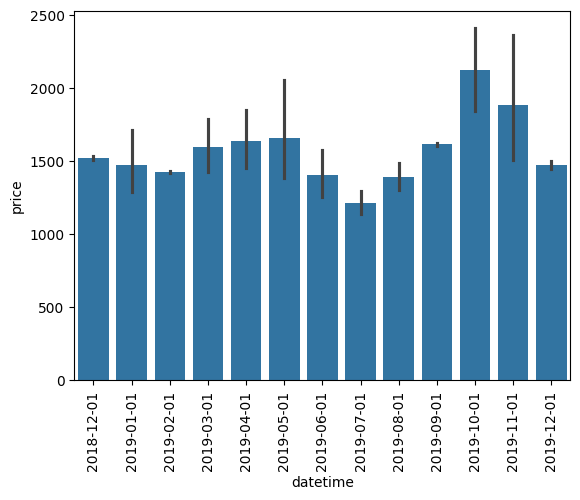

In [117]:
sns.barplot(data=df.sort_values(by=['datetime']),x='datetime',y='price')
plt.xticks(rotation=90)
plt.show()

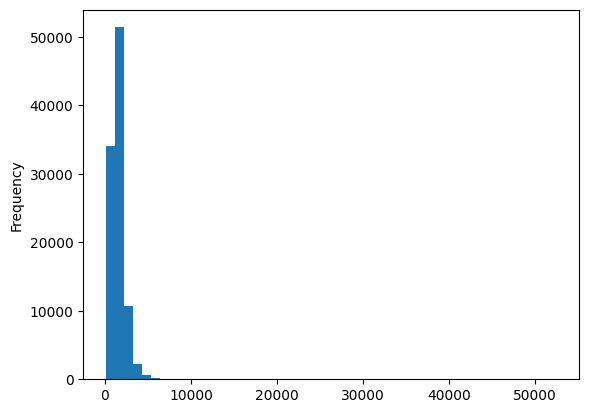

In [119]:
df['price'].plot(kind='hist',bins=50)
plt.show()
# here we can see that price is highly right skewed
# we should treat it

In [120]:
from scipy.stats import norm,poisson

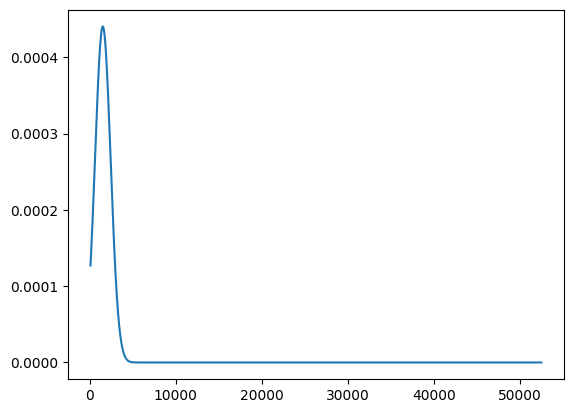

In [124]:
x=df['price'].sort_values()
y=norm.pdf(x,loc=x.mean(),scale=x.std())
plt.plot(x,y)
plt.show()

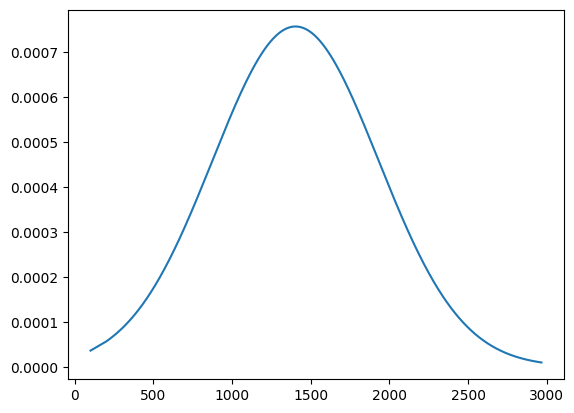

In [127]:
# 1st method with IQR
q1,q3=df['price'].quantile([0.25,0.75])
iqr=q3-q1
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr
mask=(df['price']>=lower_bound) & (df['price']<=upper_bound)
df_new=df[mask]
x=df_new['price'].sort_values()
y=norm.pdf(x,loc=x.mean(),scale=x.std())
plt.plot(x,y)
plt.show()

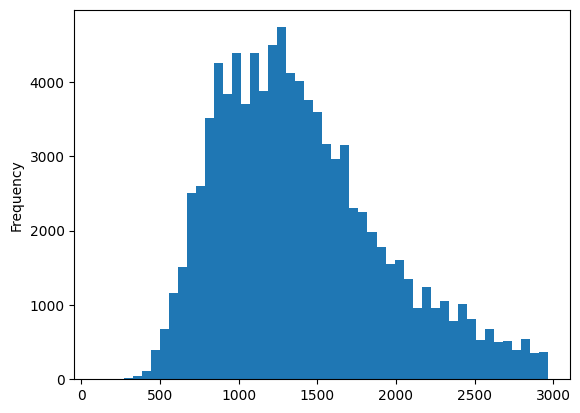

In [128]:
df_new['price'].plot(kind='hist',bins=50)
plt.show()

In [129]:
# 2nd method by using ML algorithm
from sklearn.ensemble import IsolationForest

In [134]:
iso = IsolationForest(contamination=0.1)
y_pred = iso.fit_predict(df[['price']])

# Filter out outliers
df_no_outliers = df[y_pred == 1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


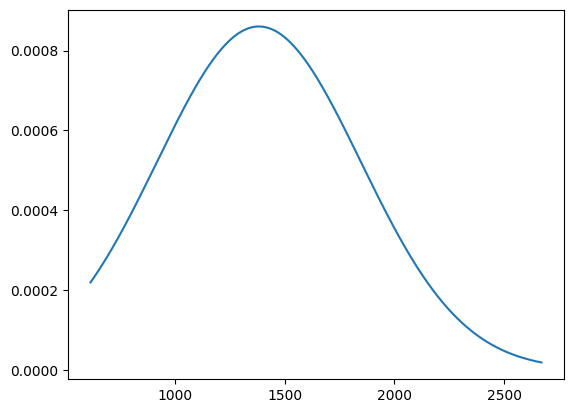

In [135]:
x=df_no_outliers['price'].sort_values()
y=norm.pdf(x,loc=x.mean(),scale=x.std())
plt.plot(x,y)
plt.show()

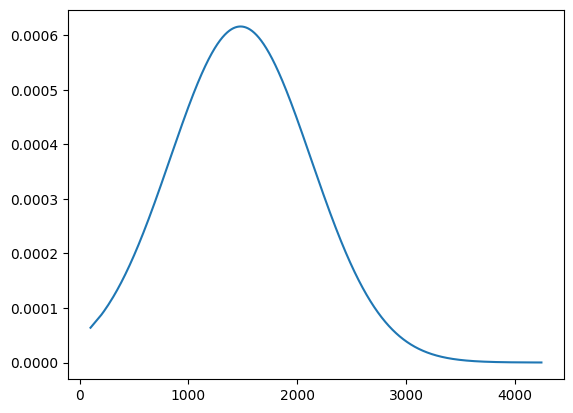

In [140]:
# 3rd method by using z-score
z=(df['price']-df['price'].mean())/df['price'].std()
mask=(z>=-3) & (z<=3)
df_no_out_z=df[mask]
x=df_no_out_z['price'].sort_values()
y=norm.pdf(x,loc=x.mean(),scale=x.std())
plt.plot(x,y)
plt.show()

In [165]:
# we can choose 1st method
X=df_new.drop(['price','datetime'],axis=1)
y=df_new['price']

In [196]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_squared_error

linear_regression=LinearRegression()

In [179]:
trainx,testx,trainy,testy=train_test_split(X,y,test_size=0.2,random_state=23)

In [197]:
model=linear_regression.fit(trainx,trainy)
pred=model.predict(testx)
print("r2=",r2_score(testy,pred))
print('mape=',mean_absolute_percentage_error(testy,pred))
print('rmse=',np.sqrt(mean_squared_error(testy,pred)))

r2= 0.17569166109572154
mape= 0.30684951462683074
rmse= 477.6000727569941


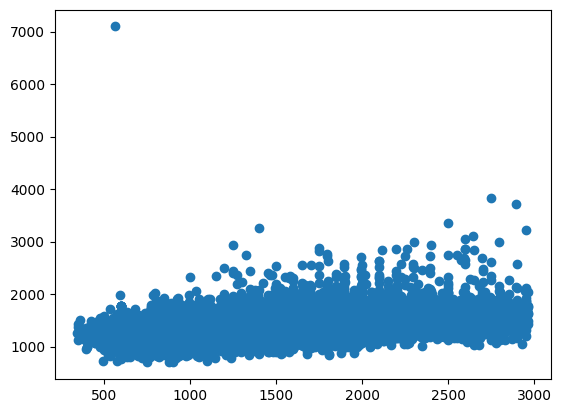

In [175]:
plt.scatter(testy,pred)

In [177]:
np.corrcoef(testy.values,pred)

array([[1.        , 0.41996185],
       [0.41996185, 1.        ]])

In [186]:
from sklearn.tree import DecisionTreeRegressor
decision_tree=DecisionTreeRegressor()

r2= 0.7330035004072581
mape= 0.12088158502352134
rmse= 271.8143128158885


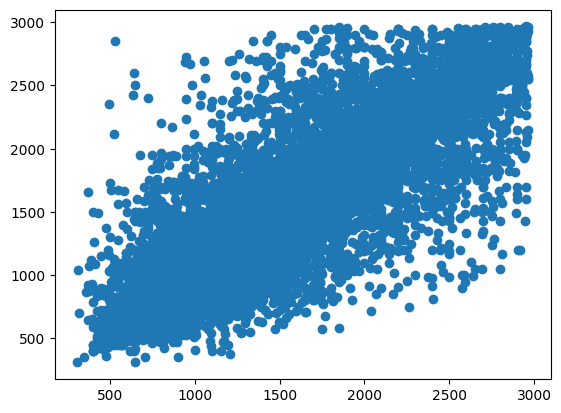

In [187]:
model=decision_tree.fit(trainx,trainy)
pred=model.predict(testx)
print("r2=",r2_score(testy,pred))
print('mape=',mean_absolute_percentage_error(testy,pred))
print('rmse=',np.sqrt(mean_squared_error(testy,pred)))
plt.scatter(testy,pred)

In [184]:
from xgboost import XGBRegressor
xgboost=XGBRegressor()

r2= 0.7936700097800721
mape= 0.1339575009069896
rmse= 238.94652360967308


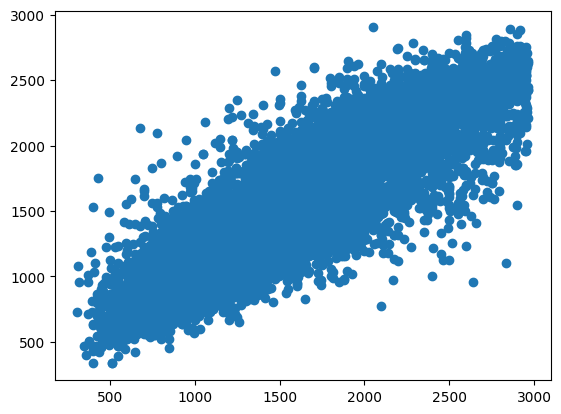

In [185]:
model=xgboost.fit(trainx,trainy)
pred=model.predict(testx)
print("r2=",r2_score(testy,pred))
print('mape=',mean_absolute_percentage_error(testy,pred))
print('rmse=',np.sqrt(mean_squared_error(testy,pred)))
plt.scatter(testy,pred)

In [188]:
from sklearn.ensemble import StackingRegressor
# Initialize the stacking model
stacking_model = StackingRegressor(
    estimators=[('dt', decision_tree), ('xgb', xgboost)],
    final_estimator=XGBRegressor()
)

r2= 0.8210180794489813
mape= 0.1127657555651993
rmse= 222.54821721780021


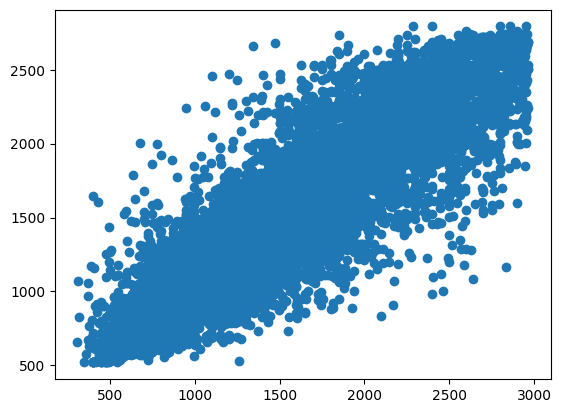

In [191]:
model=stacking_model.fit(trainx,trainy)
pred=model.predict(testx)
print("r2=",r2_score(testy,pred))
print('mape=',mean_absolute_percentage_error(testy,pred))
print('rmse=',np.sqrt(mean_squared_error(testy,pred)))
plt.scatter(testy,pred)
plt.show()

In [192]:
from sklearn.ensemble import RandomForestRegressor
random_forest=RandomForestRegressor()

r2= 0.8412956173508557
mape= 0.10179727667319043
rmse= 209.5627059848186


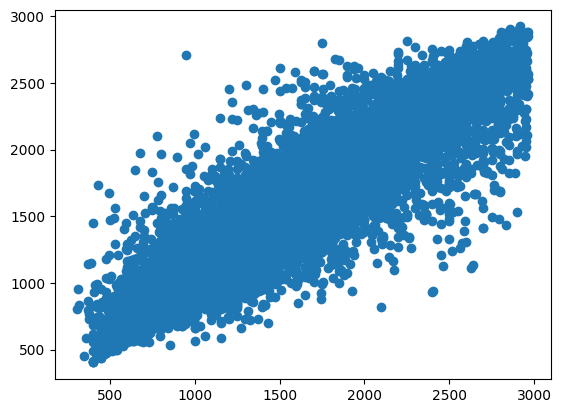

In [193]:
model=random_forest.fit(trainx,trainy)
pred=model.predict(testx)
print("r2=",r2_score(testy,pred))
print('mape=',mean_absolute_percentage_error(testy,pred))
print('rmse=',np.sqrt(mean_squared_error(testy,pred)))
plt.scatter(testy,pred)

In [194]:
stacking_model = StackingRegressor(
    estimators=[('rf', random_forest), ('xgb', xgboost)],
    final_estimator=XGBRegressor()
)

r2= 0.8423579751693716
mape= 0.10351290708941678
rmse= 208.86012803241732


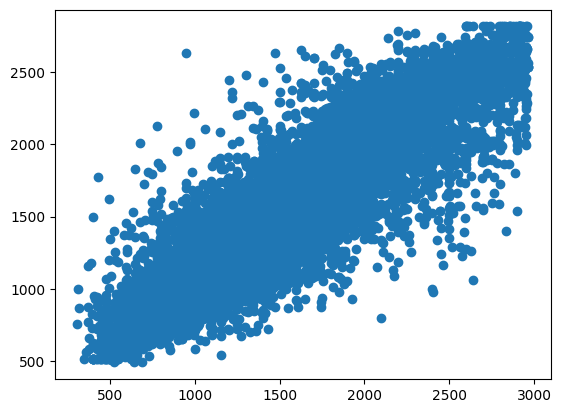

In [195]:
model=stacking_model.fit(trainx,trainy)
pred=model.predict(testx)
print("r2=",r2_score(testy,pred))
print('mape=',mean_absolute_percentage_error(testy,pred))
print('rmse=',np.sqrt(mean_squared_error(testy,pred)))
plt.scatter(testy,pred)
plt.show()

In [198]:
stacking_model = StackingRegressor(
    estimators=[('lr', linear_regression), ('xgb', xgboost)],
    final_estimator=XGBRegressor()
)

r2= 0.7894634227874369
mape= 0.13437280123797882
rmse= 241.37001459930786


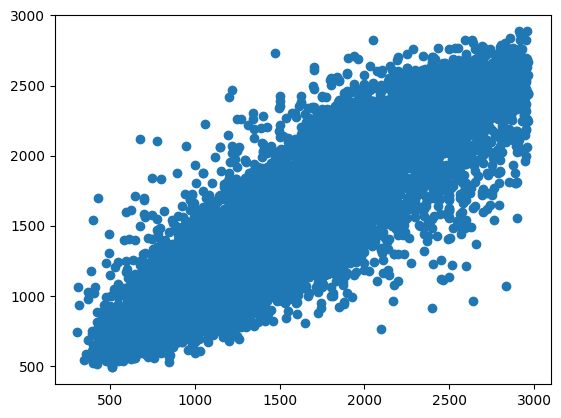

In [199]:
model=stacking_model.fit(trainx,trainy)
pred=model.predict(testx)
print("r2=",r2_score(testy,pred))
print('mape=',mean_absolute_percentage_error(testy,pred))
print('rmse=',np.sqrt(mean_squared_error(testy,pred)))
plt.scatter(testy,pred)
plt.show()

In [200]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression

In [208]:
df_new.columns

Index(['category', 'amenities', 'bathrooms', 'bedrooms', 'fee', 'has_photo',
       'pets_allowed', 'price', 'square_feet', 'latitude', 'longitude',
       'source', 'num_state', 'num_city', 'datetime'],
      dtype='object')

In [209]:
df_for_test=df_new[['category','amenities','bathrooms','bedrooms','fee','has_photo','pets_allowed','source',"num_state",'num_city']]
xtrain,xtest,ytrain,ytest=train_test_split(df_for_test,y,test_size=0.2,random_state=9)

In [210]:
# Apply mutual information for feature selection
mi_selector = SelectKBest(mutual_info_regression, k='all')
x_kbest = mi_selector.fit_transform(xtrain, ytrain)

# Display the scores for each feature
scores = mi_selector.scores_

print("Mutual Information scores:", scores)

# Select top features based on mutual information
k_best_features = mi_selector.get_support(indices=True)
selected_features = xtrain.columns[k_best_features]

print("Selected features:", selected_features)

Mutual Information scores: [0.         0.03427705 0.07966755 0.06400303 0.         0.00168611
 0.00686341 0.00662247 0.37460031 0.49748858]
Selected features: Index(['category', 'amenities', 'bathrooms', 'bedrooms', 'fee', 'has_photo',
       'pets_allowed', 'source', 'num_state', 'num_city'],
      dtype='object')


In [212]:
df_new.drop(columns=['category','amenities','bathrooms','bedrooms','fee','has_photo','pets_allowed','source',"num_state",'num_city']).corr()['price']

price          1.000000
square_feet    0.316903
latitude       0.129102
longitude     -0.060051
datetime       0.039839
Name: price, dtype: float64

In [213]:
X=df_new[['square_feet','num_state', 'num_city']]
y=df_new['price']
trainX,testX,trainY,testY=train_test_split(X,y,test_size=0.2,random_state=234)

r2= 0.1294756449856611
mape= 0.3163544150492865
rmse= 491.24232925639984


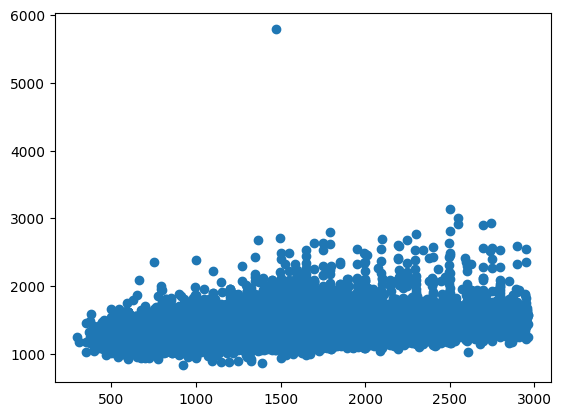

r2= 0.1294756449856611
mape= 0.3163544150492865
rmse= 491.24232925639984


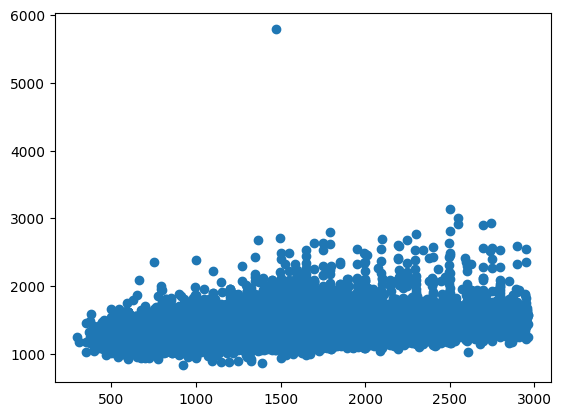

In [215]:
model=linear_regression.fit(trainX,trainY)
pred=model.predict(testX)
print("r2=",r2_score(testY,pred))
print('mape=',mean_absolute_percentage_error(testY,pred))
print('rmse=',np.sqrt(mean_squared_error(testY,pred)))
plt.scatter(testY,pred)
plt.show()

r2= 0.6642400107432103
mape= 0.13929797894755355
rmse= 305.08425163402427


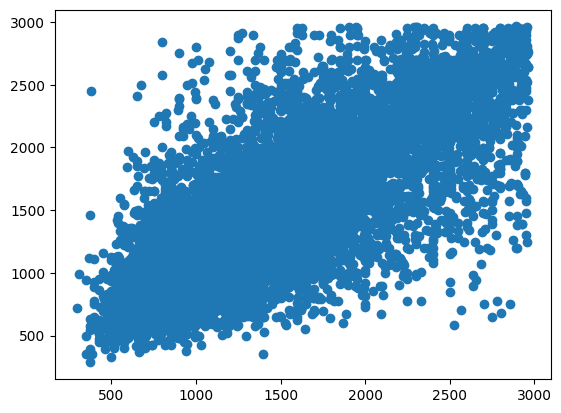

In [216]:
model=decision_tree.fit(trainX,trainY)
pred=model.predict(testX)
print("r2=",r2_score(testY,pred))
print('mape=',mean_absolute_percentage_error(testY,pred))
print('rmse=',np.sqrt(mean_squared_error(testY,pred)))
plt.scatter(testY,pred)
plt.show()

r2= 0.692018422363051
mape= 0.1654440418158977
rmse= 292.19157443371313


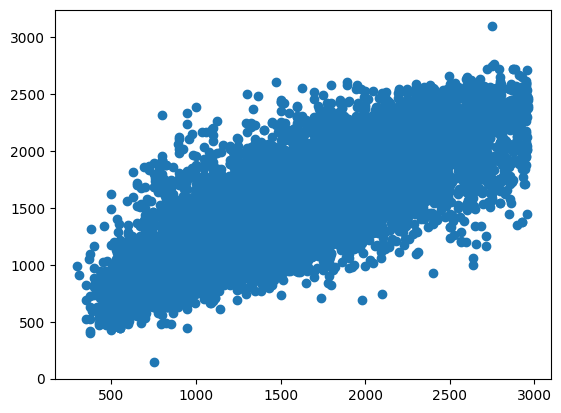

In [217]:
model=xgboost.fit(trainX,trainY)
pred=model.predict(testX)
print("r2=",r2_score(testY,pred))
print('mape=',mean_absolute_percentage_error(testY,pred))
print('rmse=',np.sqrt(mean_squared_error(testY,pred)))
plt.scatter(testY,pred)
plt.show()

r2= 0.7428762405035302
mape= 0.1303089085159832
rmse= 266.97858295624627


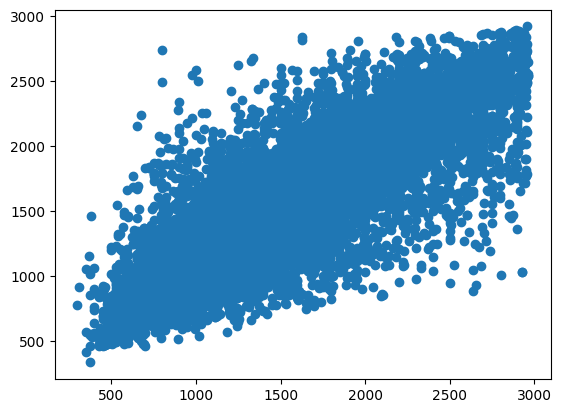

In [218]:
model=random_forest.fit(trainX,trainY)
pred=model.predict(testX)
print("r2=",r2_score(testY,pred))
print('mape=',mean_absolute_percentage_error(testY,pred))
print('rmse=',np.sqrt(mean_squared_error(testY,pred)))
plt.scatter(testY,pred)
plt.show()